<a href="https://colab.research.google.com/github/VibhaeoM01/ML-/blob/main/Churn_Prediction_with_Neural_Networks_A_Deep_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [3]:
!pip install --upgrade pip setuptools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00
  Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [17]:
import tensorflow as tf

In [18]:
print(tf.__version__)

2.15.0


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")
print(dataset)
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [21]:
#creating dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [22]:
#concatenate the DFs

X=pd.concat([X,geography,gender],axis=1)

#Drop Unnecessary columns

X=X.drop(["Geography","Gender"],axis=1)

#Spliiting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

LETS MAKE ANN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [27]:
#Initializing the ANN
classifier=Sequential()

In [28]:
#adding ip layer
classifier.add(Dense(units=11,activation='relu'))

In [29]:
#adding Hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [30]:
#adding op layer
classifier.add(Dense(units=1,activation="relu"))

In [31]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 5s 5ms/step - loss: 1.8535 - accuracy: 0.7664 - val_loss: 1.2681 - val_accuracy: 0.7906
Epoch 2/50
536/536 [==============================] - 2s 3ms/step - loss: 1.0804 - accuracy: 0.7848 - val_loss: 1.0719 - val_accuracy: 0.8027
Epoch 3/50
536/536 [==============================] - 2s 4ms/step - loss: 0.7809 - accuracy: 0.8026 - val_loss: 0.7291 - val_accuracy: 0.8054
Epoch 4/50
536/536 [==============================] - 2s 4ms/step - loss: 0.5967 - accuracy: 0.8020 - val_loss: 0.6126 - val_accuracy: 0.8054
Epoch 5/50
536/536 [==============================] - 3s 5ms/step - loss: 0.5463 - accuracy: 0.8078 - val_loss: 0.5888 - val_accuracy: 0.8122
Epoch 6/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5225 - accuracy: 0.8119 - val_loss: 0.5991 - val_accuracy: 0.8046
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4968 - accuracy: 0.8143 - val_loss: 0.4867 - val_accuracy: 0.8092
Epoch 

In [34]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


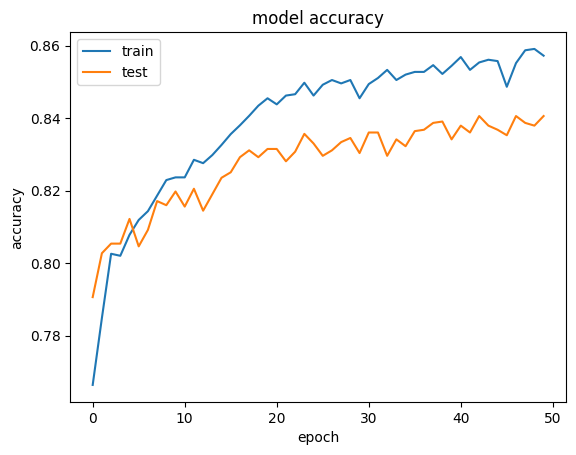

In [35]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

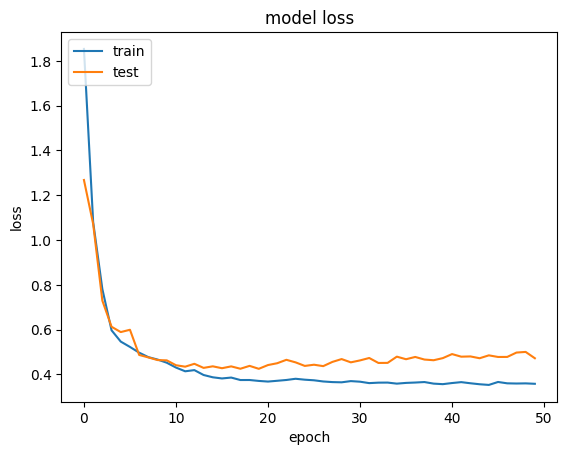

In [37]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [38]:
#Make predictions and evaluating the model

#Predicting the test set results

y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


In [42]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1522,   73],
       [ 221,  184]])

In [44]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

0.853